In [93]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.impute import SimpleImputer

In [7]:
df = pd.read_pickle('../data/joined_data_subset.p')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38556 entries, 0 to 38555
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   site_no                38556 non-null  int64  
 1   COMID                  38556 non-null  int64  
 2   order                  38556 non-null  float64
 3   area                   38556 non-null  float64
 4   Sin                    38556 non-null  float64
 5   Slp                    38556 non-null  float64
 6   Elev                   38556 non-null  float64
 7   K                      38493 non-null  float64
 8   P                      38493 non-null  float64
 9   AI                     38201 non-null  float64
 10  LAI                    38440 non-null  float64
 11  SND                    38440 non-null  float64
 12  CLY                    38440 non-null  float64
 13  SLT                    38440 non-null  float64
 14  Urb                    38440 non-null  float64
 15  WT

<AxesSubplot:xlabel='stream_wdth_va', ylabel='width_DHG'>

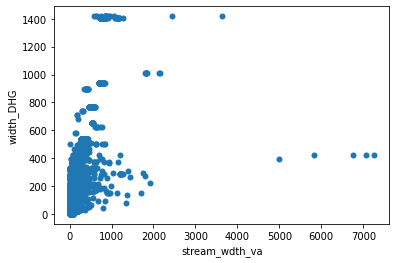

In [58]:
# Comparing peirong reach width estimates to SWOT measured widths
sns.scatterplot(data=df, y="width_m", x="stream_wdth_va", linewidth=0)

In [31]:
df[df['stream_wdth_va'] > 3000]['stream_wdth_va']

27095    4987.12236
28140    7071.36000
28142    7254.24000
28144    5821.68000
28145    6763.51200
28195    3627.12000
Name: stream_wdth_va, dtype: float64

In [23]:
swot_adcp = gpd.read_file('../data/SWOT_ADCP_Dataset_4326.gpkg')

In [30]:
swot_adcp.query("site_no == '7077000' & stream_wdth_va > 5000")['stream_wdth_va'] * 0.3048
swot_adcp['stream_wdth_va']

1921    4987.12236
Name: stream_wdth_va, dtype: float64

In [43]:
# Calculate RMSE of stream width without outlier removal
sq_diff = ((df["stream_wdth_va"] - df["width_m"]) ** 2).dropna()
np.sqrt(sum(sq_diff) / len(sq_diff))

137.96446952281175

In [47]:
df.query("stream_wdth_va > 2000")

,site_no,COMID,order,area,Sin,Slp,Elev,K,P,AI,...,std_sec_area_va,std_sec_vel_va,mean_depth_va,max_depth_va,meas_q_va,chan_stability_cd,chan_mat_cd,xsec_area_va,mean_vel_va,max_vel_va
16790,4264331,72049422,7.0,7.714524e+05,1.235699,0.000969,54.294445,3.020000e-11,0.00,1.024819,...,NaN,NaN,13.380720,26.609040,7928.717160,UNSP,UNSP,28428.318000,0.278892,1.225296
16791,4264331,72049422,7.0,7.714524e+05,1.235699,0.000969,54.294445,3.020000e-11,0.00,1.024819,...,NaN,NaN,11.551920,27.249120,8041.984548,UNSP,UNSP,24990.907000,0.323088,1.463040
27095,7077000,74063503,6.0,6.024319e+04,1.797117,0.000087,47.696837,3.020000e-11,0.00,0.831146,...,NaN,NaN,6.171895,7.313066,491.271810,SOFT,SAND,1170.453774,0.395935,0.744931
28140,7288955,74069840,6.0,3.456386e+04,1.110541,0.001054,19.100000,3.020000e-11,0.00,0.918975,...,NaN,NaN,2.755392,4.876800,979.762906,UNSP,UNSP,NaN,NaN,NaN
28142,7288955,74069840,6.0,3.456386e+04,1.110541,0.001054,19.100000,3.020000e-11,0.00,0.918975,...,NaN,NaN,3.261360,7.711440,860.832149,FIRM,SILT,NaN,NaN,NaN
28144,7288955,74069840,6.0,3.456386e+04,1.110541,0.001054,19.100000,3.020000e-11,0.00,0.918975,...,NaN,NaN,3.444240,4.754880,662.614220,UNSP,UNSP,NaN,NaN,NaN
28145,7288955,74069840,6.0,3.456386e+04,1.110541,0.001054,19.100000,3.020000e-11,0.00,0.918975,...,NaN,NaN,16.459200,31.394400,-489.881453,FIRM,SILT,NaN,NaN,NaN
28194,7289000,74069832,9.0,2.937145e+06,1.102621,0.000445,19.000000,1.000000e-13,0.22,0.924669,...,NaN,NaN,22.006560,42.672000,63925.282103,SOFT,SILT,27982.383600,3.139440,6.004560
28195,7289000,74069832,9.0,2.937145e+06,1.102621,0.000445,19.000000,1.000000e-13,0.22,0.924669,...,NaN,NaN,9.144000,32.613600,59465.378700,FIRM,SILT,33166.371000,1.813560,NaN


In [57]:
df_measured_width_outliers_removed = df.query("stream_wdth_va < 2000")[['stream_wdth_va', 'width_m']]
sq_diff = ((df_measured_width_outliers_removed ["stream_wdth_va"] -df_measured_width_outliers_removed ["width_m"]) ** 2).dropna()
np.sqrt(sum(sq_diff) / len(sq_diff))

118.90728697171232

In [111]:
FEATURES_OF_INTEREST = [
    "order",
    "area",
    "Sin",
    "Slp",
    "Elev",
    "K",
    "P",
    "AI",
    "LAI",
    "SND",
    "CLY",
    "SLT",
    "Urb",
#     "WTD",
    "HW",
    "DOR",
    "width_m",  # peirong width
    "mean_depth_va",
#     "max_depth_va"
    # "stream_wdth_va", # swot measured width
#     "drain_area_va",
#     "contrib_drain_area_va",
#     "alt_va",
]

In [109]:
df_na_feature_count = df[FEATURES_OF_INTEREST].isna().sum()

In [110]:
df_na_feature_count

order               0
area                0
Sin                 0
Slp                 0
Elev                0
K                  63
P                  63
AI                355
LAI               116
SND               116
CLY               116
SLT               116
Urb               116
HW                116
DOR                 0
width_m             0
mean_depth_va       0
max_depth_va     1381
dtype: int64

In [84]:
feature_col_names_with_nas = df_na_feature_count[df_na_feature_count > 0].index

In [100]:
df_foi = df[FEATURES_OF_INTEREST]

df_foi = df_foi.fillna(df_foi.mean())

In [104]:
df_foi

,order,area,Sin,Slp,Elev,K,P,AI,LAI,SND,CLY,SLT,Urb,HW,DOR,width_m
0,4.0,3541.641815,1.348931,0.000785,277.706667,3.020000e-11,0.0,1.292695,2.736374,47.397436,14.564103,38.461538,0.0,0.000000,0.0,129.28183
1,4.0,3541.641815,1.348931,0.000785,277.706667,3.020000e-11,0.0,1.292695,2.736374,47.397436,14.564103,38.461538,0.0,0.000000,0.0,129.28183
2,4.0,3541.641815,1.348931,0.000785,277.706667,3.020000e-11,0.0,1.292695,2.736374,47.397436,14.564103,38.461538,0.0,0.000000,0.0,129.28183
3,4.0,3541.641815,1.348931,0.000785,277.706667,3.020000e-11,0.0,1.292695,2.736374,47.397436,14.564103,38.461538,0.0,0.000000,0.0,129.28183
4,4.0,3541.641815,1.348931,0.000785,277.706667,3.020000e-11,0.0,1.292695,2.736374,47.397436,14.564103,38.461538,0.0,0.000000,0.0,129.28183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38551,1.0,101.732234,1.461904,0.000014,319.210870,3.020000e-11,0.0,0.738019,0.063840,53.000000,18.204819,29.132530,0.0,0.000379,0.0,119.30070
38552,1.0,101.732234,1.461904,0.000014,319.210870,3.020000e-11,0.0,0.738019,0.063840,53.000000,18.204819,29.132530,0.0,0.000379,0.0,119.30070
38553,1.0,101.732234,1.461904,0.000014,319.210870,3.020000e-11,0.0,0.738019,0.063840,53.000000,18.204819,29.132530,0.0,0.000379,0.0,119.30070
38554,1.0,101.732234,1.461904,0.000014,319.210870,3.020000e-11,0.0,0.738019,0.063840,53.000000,18.204819,29.132530,0.0,0.000379,0.0,119.30070


In [113]:
df_foi.shape[1]

16

In [114]:
a = np.array([1,2,3])

In [119]:
isinstance(a, np.ndarray)

True

In [116]:
a

array([1, 2, 3])

In [120]:
import torch

In [122]:
t = torch.from_numpy(a)

In [125]:
torch.is_tensor(t)

True

In [143]:
# df_foi[df_foi.select_dtypes(include=np.number)]
# df_foi.dtypes
# df_foi.columns[df_foi.dtypes.eq(np.number)]
df_foi[df_foi.columns[df_foi.dtypes.eq(np.number)]].apply(pd.to_numeric, downcast='float').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38556 entries, 0 to 38555
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   order    38556 non-null  float32
 1   area     38556 non-null  float32
 2   Sin      38556 non-null  float32
 3   Slp      38556 non-null  float32
 4   Elev     38556 non-null  float32
 5   K        38556 non-null  float32
 6   P        38556 non-null  float32
 7   AI       38556 non-null  float32
 8   LAI      38556 non-null  float32
 9   SND      38556 non-null  float32
 10  CLY      38556 non-null  float32
 11  SLT      38556 non-null  float32
 12  Urb      38556 non-null  float32
 13  HW       38556 non-null  float32
 14  DOR      38556 non-null  float32
 15  width_m  38556 non-null  float32
dtypes: float32(16)
memory usage: 2.6 MB


In [149]:
df[df['mean_depth_va'] > 0.5]

,site_no,COMID,order,area,Sin,Slp,Elev,K,P,AI,...,std_sec_area_va,std_sec_vel_va,mean_depth_va,max_depth_va,meas_q_va,chan_stability_cd,chan_mat_cd,xsec_area_va,mean_vel_va,max_vel_va
0,1010000,72041835,4.0,3541.641815,1.348931,0.000785,277.706667,3.020000e-11,0.0,1.292695,...,NaN,NaN,1.979981,3.148889,277.919744,FIRM,BLDR,273.531702,1.015898,2.365858
1,1010000,72041835,4.0,3541.641815,1.348931,0.000785,277.706667,3.020000e-11,0.0,1.292695,...,NaN,NaN,1.303244,2.498141,110.612740,FIRM,BLDR,169.051316,0.654406,1.627937
2,1010000,72041835,4.0,3541.641815,1.348931,0.000785,277.706667,3.020000e-11,0.0,1.292695,...,NaN,NaN,1.793443,3.253130,63.571010,FIRM,BLDR,109.762386,0.579120,1.378001
3,1010000,72041835,4.0,3541.641815,1.348931,0.000785,277.706667,3.020000e-11,0.0,1.292695,...,NaN,NaN,1.253642,1.883969,12.402779,FIRM,BLDR,51.468262,0.241097,0.905866
4,1010000,72041835,4.0,3541.641815,1.348931,0.000785,277.706667,3.020000e-11,0.0,1.292695,...,NaN,NaN,1.527048,2.639873,54.553000,FIRM,BLDR,105.930323,0.515112,1.292962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38551,492142094421501,71041470,1.0,101.732234,1.461904,0.000014,319.210870,3.020000e-11,0.0,0.738019,...,NaN,NaN,8.378952,9.552432,135.955299,FIRM,SAND,3973.924896,0.034138,0.420319
38552,492142094421501,71041470,1.0,101.732234,1.461904,0.000014,319.210870,3.020000e-11,0.0,0.738019,...,NaN,NaN,7.726680,NaN,-36.528733,FIRM,SAND,3951.565931,0.009144,0.372466
38553,492142094421501,71041470,1.0,101.732234,1.461904,0.000014,319.210870,3.020000e-11,0.0,0.738019,...,NaN,NaN,7.952232,8.888882,14.139876,FIRM,SAND,3792.319041,0.003658,0.260299
38554,492142094421501,71041470,1.0,101.732234,1.461904,0.000014,319.210870,3.020000e-11,0.0,0.738019,...,NaN,NaN,7.766304,8.902598,55.217852,FIRM,SAND,3666.943655,0.015240,0.226771


In [183]:
# df[(df['mean_depth_va'] > 10) & (df['order'] < 7)]['mean_depth_va'].count()
# df[(df['mean_depth_va'] > 23)]['mean_depth_va'].count()
# df[(df['mean_depth_va'] > 23)]
df[df['site_no'] == 13290450]
# df[(df['mean_depth_va'] > 0)]['mean_depth_va'].max()

,site_no,COMID,order,area,Sin,Slp,Elev,K,P,AI,...,std_sec_area_va,std_sec_vel_va,mean_depth_va,max_depth_va,meas_q_va,chan_stability_cd,chan_mat_cd,xsec_area_va,mean_vel_va,max_vel_va
35755,13290450,78020389,6.0,171117.854028,1.096452,0.002222,434.746568,1.000000e-15,0.19,0.48521,...,NaN,NaN,5.185562,7.195109,291.371492,FIRM,BLDR,362.465885,0.803758,1.808988
35756,13290450,78020389,6.0,171117.854028,1.096452,0.002222,434.746568,1.000000e-15,0.19,0.48521,...,NaN,NaN,4.720333,7.690104,295.431250,FIRM,BLDR,428.489168,0.689458,1.662074
35757,13290450,78020389,6.0,171117.854028,1.096452,0.002222,434.746568,1.000000e-15,0.19,0.48521,...,NaN,NaN,4.590898,6.968947,239.835511,FIRM,BLDR,327.678078,0.731825,1.709928
35758,13290450,78020389,6.0,171117.854028,1.096452,0.002222,434.746568,1.000000e-15,0.19,0.48521,...,NaN,NaN,5.224882,7.427062,365.120512,FIRM,BLDR,389.233562,0.938174,2.203094
35759,13290450,78020389,6.0,171117.854028,1.096452,0.002222,434.746568,1.000000e-15,0.19,0.48521,...,NaN,NaN,4.879238,7.446874,400.388267,FIRM,BLDR,413.082227,0.969264,2.375916
35760,13290450,78020389,6.0,171117.854028,1.096452,0.002222,434.746568,1.000000e-15,0.19,0.48521,...,NaN,NaN,36.201096,59.069935,824.813997,FIRM,GRVL,11998.697722,0.070104,1.590142
35761,13290450,78020389,6.0,171117.854028,1.096452,0.002222,434.746568,1.000000e-15,0.19,0.48521,...,NaN,NaN,5.187391,7.459980,409.734752,FIRM,BLDR,430.800873,0.950976,2.242109
35762,13290450,78020389,6.0,171117.854028,1.096452,0.002222,434.746568,1.000000e-15,0.19,0.48521,...,NaN,NaN,36.012120,61.825937,382.277434,FIRM,GRVL,12597.646800,0.029870,1.146048
35763,13290450,78020389,6.0,171117.854028,1.096452,0.002222,434.746568,1.000000e-15,0.19,0.48521,...,NaN,NaN,36.149280,59.837117,1747.149460,FIRM,GRVL,12913.517000,0.135636,0.947014
35764,13290450,78020389,6.0,171117.854028,1.096452,0.002222,434.746568,1.000000e-15,0.19,0.48521,...,NaN,NaN,5.455920,8.199120,566.336940,FIRM,BLDR,478.450450,1.188720,2.514600
